In [ ]:
 import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from scipy.spatial.distance import sqeuclidean

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
from sklearn.metrics import adjusted_rand_score

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Реализация на Python с нуля


In [ ]:
class HierarchicalAgglomerativeClustering:
    def __init__(self, n_clusters=2):
        self.n_clusters = n_clusters

#1) для каждой пары кластеров рассчитывается расстояние Уорда на основе евклидова расстояния;
#Метод Уорда (Ward's linkage): расстояние между кластерами равно
#приросту суммы квадратов расстояний от точек до центроидов кластеров при объединении этих кластеров.
#Этот метод стремится минимизировать внутрикластерную дисперсию.
#d_{\text{ward}}(C_i, C_j) = \frac{n_i n_j}{n_i + n_j} \rho^2(\bar{x}_i, \bar{x}_j)

    @staticmethod
    def _ward_distance(c1, c2):
        n1, n2 = len(c1), len(c2)
        c1_mean, c2_mean = np.mean(c1, axis=0), np.mean(c2, axis=0)
        sqeuclidean_dist = sqeuclidean(c1_mean, c2_mean)

        return (n1 * n2) / (n1 + n2) * sqeuclidean_dist

#2) метки с минимальным расстоянием, то есть ближайшие кластеры объединяются в новый следующим образом:
#всем объектам одного кластера присваиваются метки другого, после чего все новые метки,
#которые больше меток другого кластера, уменьшаются на 1, то есть их нумерация сдвигается влево
#для устранения пропусков в последовательности;

    @staticmethod
    def _update_labels(labels, min_cdist_idxs):
        # assign a cluster number to labels
        labels[labels == min_cdist_idxs[1]] = min_cdist_idxs[0]
        labels[labels > min_cdist_idxs[1]] -= 1

        return labels

    def fit_predict(self, X):
        labels = np.arange(len(X))
        clusters = [[x] for x in X]

        while len(clusters) > self.n_clusters:
            min_cdist, min_cdist_idxs = np.inf, []  #равно бесконечности и пустому списку

            for i in range(len(clusters) - 1):
                for j in range(i + 1, len(clusters)):
                    cdist = self._ward_distance(clusters[i], clusters[j])

                    if cdist < min_cdist:
                        min_cdist = cdist
                        min_cdist_idxs = (i, j)

            labels = self._update_labels(labels, min_cdist_idxs)
            clusters[min_cdist_idxs[0]].extend(clusters.pop(min_cdist_idxs[1]))   #pop Возвращает элемент [на указанной позиции], удаляя его из списка: list.pop([i]).
            #extend() добавляет новые элементы в конец списка, но, в отличие от append(), принимает в качестве параметров итерируемые объекты: списки, кортежи и строки.
            #При этом объединяемые списки могут содержать элементы любых типов: например, вы можете объединить строки с числами или числа с кортежами.

        return np.array(labels)

Создание изотропных гауссовских BLOB-объектов для кластеризации.

In [ ]:
#sklearn.datasets.make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)

Параметры:
n_samplesint или array-like, default=100
Если int, это общее количество точек, поровну разделенных между кластерами. Если array-like, каждый элемент последовательности указывает количество образцов на кластер.

Изменено в версии v0.20: теперь можно передать параметру n_samples массив, аналогичный массиву

n_featuresint, по умолчанию = 2
Количество признаков для каждого образца.

centersint или аналогичный массиву вид (n_centers, n_features), по умолчанию = None
Количество центров для генерации или фиксированные местоположения центров. Если n_samples — это int, а centers — None, генерируются 3 центра. Если n_samples — аналогичный массиву, то центры должны быть либо None, либо массивом длины, равной длине n_samples.

cluster_stdfloat или аналогичный массиву float, по умолчанию = 1,0
Стандартное отклонение кластеров.

center_boxtuple из float (min, max), по умолчанию = (-10,0, 10,0)
Ограничивающий прямоугольник для каждого центра кластера, когда центры генерируются случайным образом.

shufflebool, по умолчанию = True
Перемешать образцы.

random_stateint, экземпляр RandomState или None, default=None
Определяет генерацию случайных чисел для создания набора данных. Передайте int для воспроизводимого вывода через несколько вызовов функций. См. Глоссарий.

return_centersbool, default=False
Если True, то возвращайте центры каждого кластера.

In [ ]:
X2, y2 = make_blobs(n_samples=75, n_features=2, centers=2, random_state=0)   #centers = n_clusters=3  n_samples=75 должно делиться нацело на n_clusters    - для ac
print(y2)

[1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1
 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 0
 0]


In [ ]:
print(X2)

[[ 1.19404184  2.80772861]
 [ 2.47034915  4.09862906]
 [ 2.66934689  1.81987033]
 [ 1.70536064  4.43277024]
 [ 1.41942144  1.57409695]
 [ 0.87305123  4.71438583]
 [ 1.84070628  3.56162231]
 [ 1.37861172  3.61897724]
 [ 1.0427873   4.60625923]
 [ 1.9263585   4.15243012]
 [ 2.52092996 -0.63858003]
 [ 0.56400993  1.33705536]
 [ 3.2460247   2.84942165]
 [ 2.50904929  5.7731461 ]
 [ 3.92282648  1.80370832]
 [-0.65392827  4.76656958]
 [ 0.66471755  4.35995267]
 [ 3.93841822 -0.4500954 ]
 [ 0.62835793  4.4601363 ]
 [ 1.62011397  2.74692739]
 [ 0.89011768  1.79849015]
 [ 1.42013331  4.63746165]
 [ 3.54351972  2.79355284]
 [ 1.28535145  1.43691285]
 [ 3.00251949  0.74265357]
 [ 2.2635425   1.8743027 ]
 [ 1.64164854  0.15020885]
 [ 2.11567076  3.06896151]
 [ 1.7373078   4.42546234]
 [ 1.1424453   2.01467995]
 [ 0.4666179   3.86571303]
 [ 1.78726415  1.70012006]
 [ 1.36069966  0.74802912]
 [ 0.08848433  2.32299086]
 [ 2.41163392  1.60423683]
 [ 0.94808785  4.7321192 ]
 [ 1.38093486  0.92949422]
 

In [ ]:
#Adjusted Rand Index (ARI)
#ARI измеряет сходство между двумя разбиениями данных, учитывая случайные совпадения. Значение ближе к 1 указывает на хорошее совпадение.
#ARI полезен для оценки стабильности кластеризации и сравнения различных разбиений данных.
ac = HierarchicalAgglomerativeClustering(n_clusters=2)   #centers = n_clusters=3  n_samples=75 должно делиться нацело на n_clusters   - для  X2, y2
ac_pred_res = ac.fit_predict(X2)
ac_ari = adjusted_rand_score(y2, ac_pred_res)
print(f'Adjusted Rand Score for AgglomerativeClustering: {ac_ari}', '', sep='\n')
print('prediction', ac_pred_res, sep='\n')


Adjusted Rand Score for AgglomerativeClustering: 0.6138328530259366

prediction
[0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0
 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1
 1]


In [ ]:
sk_ac = AgglomerativeClustering(n_clusters=2, linkage='ward')   #centers = n_clusters=3  n_samples=75 не обязательно должно делиться нацело на n_clusters   - как для  ac чтобы можно было сравнивать
sk_ac_pred_res = sk_ac.fit_predict(X2)
sk_ac_ari = adjusted_rand_score(y2, sk_ac_pred_res)
print(f'Adjusted Rand Score for sk AgglomerativeClustering: {sk_ac_ari}', '', sep='\n')
print('prediction', sk_ac_pred_res, sep='\n')

Adjusted Rand Score for sk AgglomerativeClustering: 0.6138328530259366

prediction
[0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0
 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1
 1]


Визуализация прогнозов

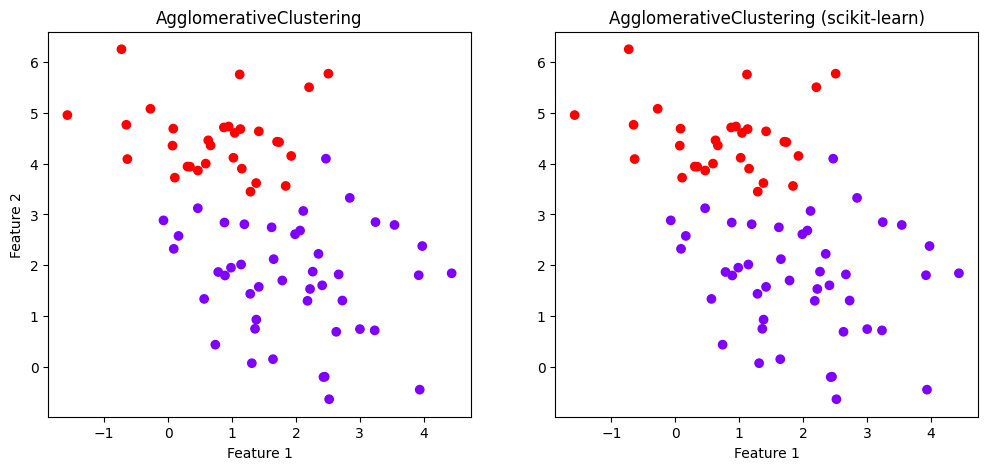

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X2[:, 0], X2[:, 1], c=ac_pred_res, cmap='rainbow')
plt.title('AgglomerativeClustering')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(1, 2, 2)
plt.scatter(X2[:, 0], X2[:, 1], c=sk_ac_pred_res, cmap='rainbow')
plt.title('AgglomerativeClustering (scikit-learn)')
plt.xlabel("Feature 1")

plt.show()

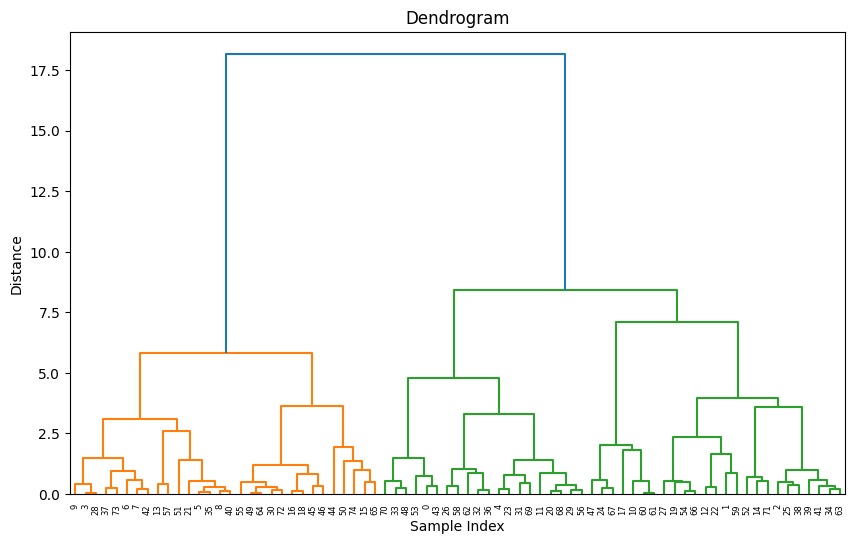

In [ ]:
linkage_matrix = linkage(X2, method='ward', metric='euclidean')

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, color_threshold=10)
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.title("Dendrogram")
plt.show()